In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

/home/john/anaconda3/envs/cs231n/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#img_width, img_height = 224, 224
img_dir = "assets/car-rocket-ship/images/"
train_data_dir = img_dir + "train"
validation_data_dir = img_dir + "val"
img_width, img_height = 128, 128
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
save_dir = "assets/imnet_nofc/VGG19/%ix%i/" % (img_width, img_height)


In [14]:
batch_size = 600

train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=10)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
shuffle=False,
class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
shuffle=False,
class_mode = "categorical")

Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [15]:
# takes a bit to load images
Dat_train = train_generator.next()
Dat_test = test_generator.next()

In [16]:
print(Dat_train[0].shape)
print(Dat_test[0].shape)

(600, 128, 128, 3)
(600, 128, 128, 3)


[0. 1. 0.]
[0. 1. 0.]


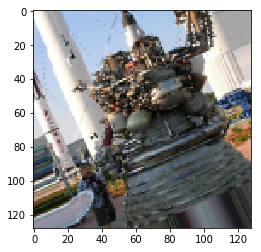

In [17]:
num = 300
plt.imshow(Dat_train[0][num,:,:,:])
print(Dat_train[1][num,:])
plt.imshow(Dat_test[0][num,:,:,:])
print(Dat_test[1][num,:])

In [18]:
# this takes a bit, it runs the network on all of the input images
X_tr = model.predict(Dat_train[0],verbose=1)
X_te = model.predict(Dat_test[0],verbose=1)


600/600 [==============================] - 36s 60ms/step


In [26]:
np.save(save_dir + "X_train",X_tr)
np.save(save_dir + "y_train",Dat_train[1])
np.save(save_dir + "X_test",X_te)
np.save(save_dir + "y_test",Dat_test[1])


In [18]:
print(xtr.shape)

(600, 7, 7, 512)
